In [31]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, roc_curve, auc
from sklearn.linear_model import LogisticRegression, RidgeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neural_network import MLPClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.decomposition import PCA
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from imblearn.over_sampling import SMOTE

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [32]:
df = pd.read_csv("creditcard.csv")

In [33]:
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [34]:
print("Veri Kümesi Bilgileri:")
df.info()

Veri Kümesi Bilgileri:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  

In [35]:
print("Temel İstatistikler:")
print(df.describe())

Temel İstatistikler:
                Time            V1            V2            V3            V4  \
count  284807.000000  2.848070e+05  2.848070e+05  2.848070e+05  2.848070e+05   
mean    94813.859575  1.168375e-15  3.416908e-16 -1.379537e-15  2.074095e-15   
std     47488.145955  1.958696e+00  1.651309e+00  1.516255e+00  1.415869e+00   
min         0.000000 -5.640751e+01 -7.271573e+01 -4.832559e+01 -5.683171e+00   
25%     54201.500000 -9.203734e-01 -5.985499e-01 -8.903648e-01 -8.486401e-01   
50%     84692.000000  1.810880e-02  6.548556e-02  1.798463e-01 -1.984653e-02   
75%    139320.500000  1.315642e+00  8.037239e-01  1.027196e+00  7.433413e-01   
max    172792.000000  2.454930e+00  2.205773e+01  9.382558e+00  1.687534e+01   

                 V5            V6            V7            V8            V9  \
count  2.848070e+05  2.848070e+05  2.848070e+05  2.848070e+05  2.848070e+05   
mean   9.604066e-16  1.487313e-15 -5.556467e-16  1.213481e-16 -2.406331e-15   
std    1.380247e+00  

C:\Users\uzsez\AppData\Local\Temp\ipykernel_26748\2142092172.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=correlations.values, y=correlations.index, palette="coolwarm")


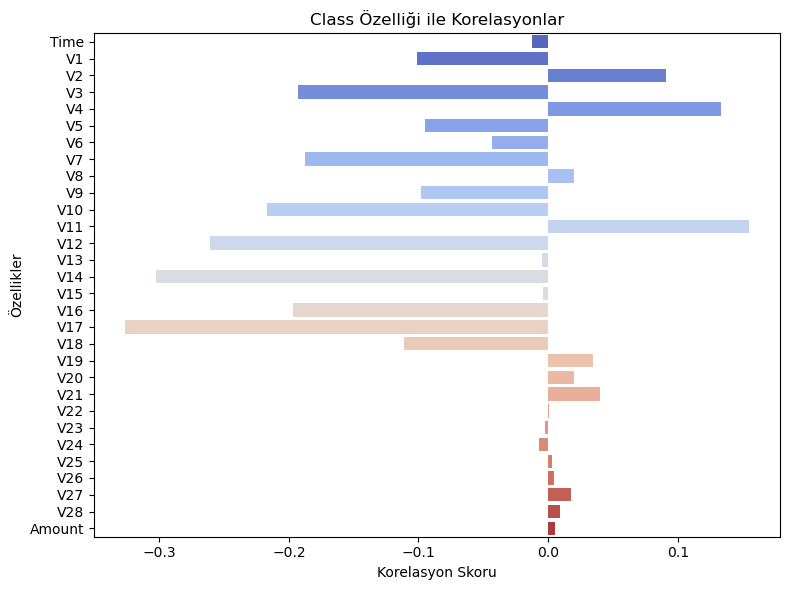

In [36]:
# Korelasyon Matrisi (sadece Class ile olanlar)
correlations = df.corr()['Class'].drop('Class')
plt.figure(figsize=(8,6))
sns.barplot(x=correlations.values, y=correlations.index, palette="coolwarm")
plt.title("Class Özelliği ile Korelasyonlar")
plt.xlabel("Korelasyon Skoru")
plt.ylabel("Özellikler")
plt.tight_layout()
plt.show()

# Sınıf dağılımını görselleştirelim

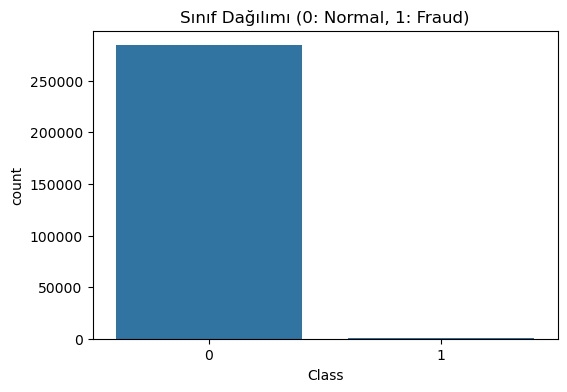

In [37]:
plt.figure(figsize=(6,4))
sns.countplot(x='Class', data=df)
plt.title("Sınıf Dağılımı (0: Normal, 1: Fraud)")
plt.show()

In [38]:
print("Orijinal veri sınıf dağılımı:", Counter(df['Class']))

Orijinal veri sınıf dağılımı: Counter({0: 284315, 1: 492})


# Veri dengesizliğinin model performansına etkisi


Veri dengesizliği problemi: Veri setinde fraud işlemler çok az olduğu için model çoğunluk sınıfını öğrenir ve dolandırıcılık işlemlerini tahmin etmekte başarısız olabilir.

In [39]:
methods = pd.DataFrame({
    "Yöntem": ["Oversampling (SMOTE)", "Undersampling (Random Under Sampling)", "Class Weighting", "Anomaly Detection"],
    "Avantajları": ["Azınlık sınıf örnek sayısını artırır", "Çoğunluk sınıf örnek sayısını azaltır", "Model eğitiminde ağırlık kullanır", "Dolandırıcılık işlemlerini anomali olarak ele alır"],
    "Dezavantajları": ["Aşırı uyum riski", "Bilgi kaybı yaşanabilir", "Ağırlık ayarı zor olabilir", "Hassas metrikler gerektirir"]
})
print(methods)


                                  Yöntem  \
0                   Oversampling (SMOTE)   
1  Undersampling (Random Under Sampling)   
2                        Class Weighting   
3                      Anomaly Detection   

                                         Avantajları  \
0               Azınlık sınıf örnek sayısını artırır   
1              Çoğunluk sınıf örnek sayısını azaltır   
2                  Model eğitiminde ağırlık kullanır   
3  Dolandırıcılık işlemlerini anomali olarak ele ...   

                Dezavantajları  
0             Aşırı uyum riski  
1      Bilgi kaybı yaşanabilir  
2   Ağırlık ayarı zor olabilir  
3  Hassas metrikler gerektirir  


# Time-based pattern analizi

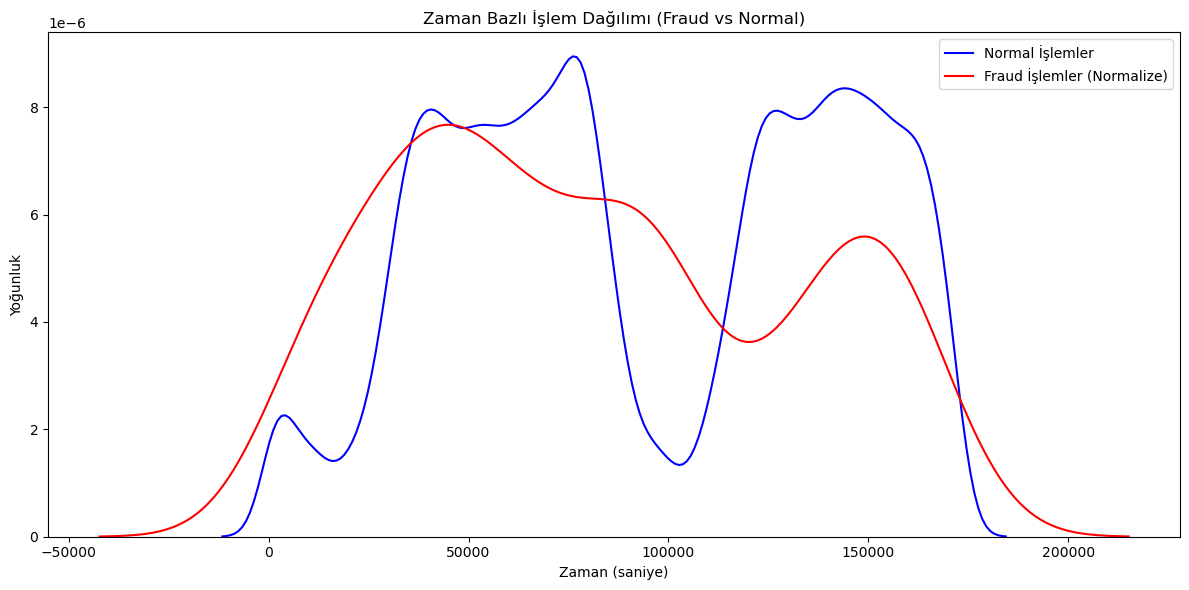

In [40]:
plt.figure(figsize=(12,6))

# Normal işlemler
sns.kdeplot(df[df['Class'] == 0]['Time'], label='Normal İşlemler', color='blue')

# Fraud işlemler (normalize edilmiş)
fraud_time = df[df['Class'] == 1]['Time']
fraud_time_norm = (fraud_time - fraud_time.min()) / (fraud_time.max() - fraud_time.min()) * df['Time'].max()
sns.kdeplot(fraud_time_norm, label='Fraud İşlemler (Normalize)', color='red')

plt.title("Zaman Bazlı İşlem Dağılımı (Fraud vs Normal)")
plt.xlabel("Zaman (saniye)")
plt.ylabel("Yoğunluk")
plt.legend()
plt.tight_layout()
plt.show()

# Amount-based pattern analizi

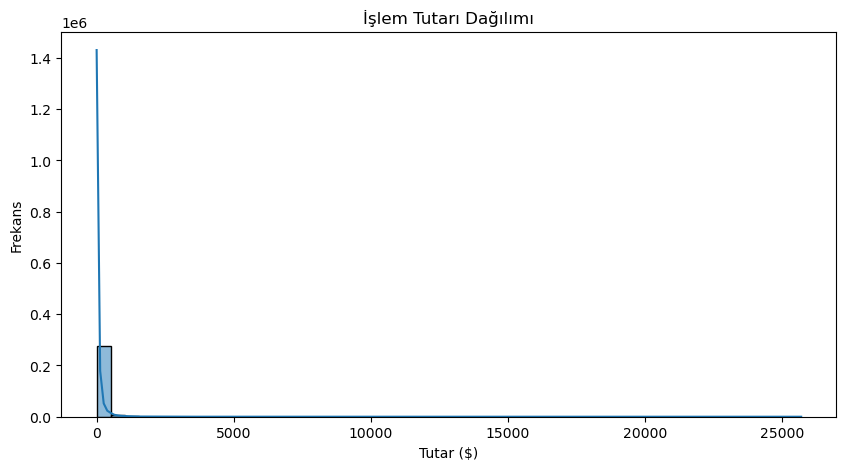

In [41]:
plt.figure(figsize=(10,5))
sns.histplot(df['Amount'], bins=50, kde=True)
plt.title("İşlem Tutarı Dağılımı")
plt.xlabel("Tutar ($)")
plt.ylabel("Frekans")
plt.show()

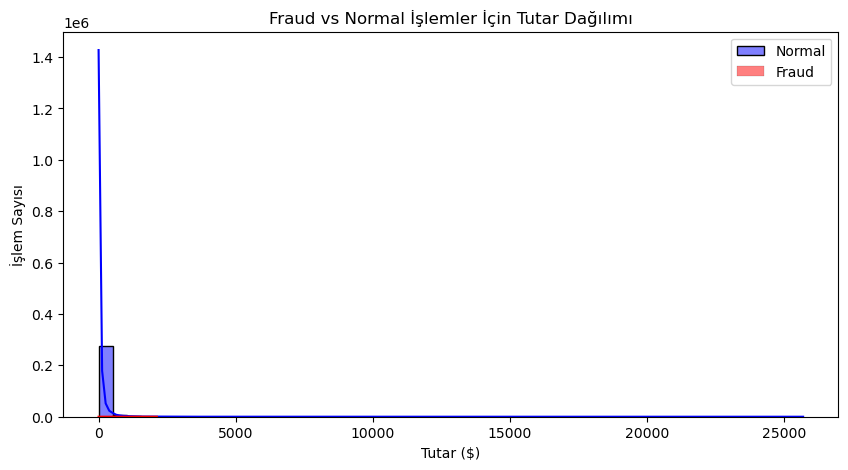

In [42]:
plt.figure(figsize=(10,5))
sns.histplot(df[df['Class'] == 0]['Amount'], bins=50, kde=True, label='Normal', color='blue', alpha=0.5)
sns.histplot(df[df['Class'] == 1]['Amount'], bins=50, kde=True, label='Fraud', color='red', alpha=0.5)
plt.title("Fraud vs Normal İşlemler İçin Tutar Dağılımı")
plt.xlabel("Tutar ($)")
plt.ylabel("İşlem Sayısı")
plt.legend()
plt.show()

# Veri ölçekleme işlemi (Amount ve Time değişkenlerini standartlaştırıyoruz)

In [43]:
print("Veri Ölçekleme İşlemi Yapılıyor...")
scaler = StandardScaler()
df[['Amount', 'Time']] = scaler.fit_transform(df[['Amount', 'Time']])

Veri Ölçekleme İşlemi Yapılıyor...


In [44]:
# Veriyi bağımsız değişkenler (X) ve hedef değişken (y) olarak ayıralım
X = df.drop(columns=['Class'])
y = df['Class']

In [45]:
# Eğitim ve test setlerine ayırma işlemi
print("Veri Eğitim ve Test Setine Ayrılıyor...")
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)
print(f"Eğitim verisi boyutu: {X_train.shape}, Test verisi boyutu: {X_test.shape}")


Veri Eğitim ve Test Setine Ayrılıyor...
Eğitim verisi boyutu: (227845, 30), Test verisi boyutu: (56962, 30)


In [46]:
# Oversampling yöntemi (SMOTE kullanımı ile azınlık sınıfı artırıyoruz)
print("SMOTE ile Azınlık Sınıfı Arttırılıyor...")
smote = SMOTE(sampling_strategy=0.5, random_state=42)
X_train_smote, y_train_smote = smote.fit_resample(X_train, y_train)
print("SMOTE Sonrası Sınıf Dağılımı:", Counter(y_train_smote))

SMOTE ile Azınlık Sınıfı Arttırılıyor...
SMOTE Sonrası Sınıf Dağılımı: Counter({0: 227451, 1: 113725})


In [47]:
# Değerlendirme fonksiyonu
def evaluate_model(name, model, X_tr, X_te, y_tr, y_te):
    model.fit(X_tr, y_tr)
    y_pred = model.predict(X_te)
    print(f"\n{name} Performansı:")
    print("Accuracy:", accuracy_score(y_te, y_pred))
    print("Classification Report:")
    print(classification_report(y_te, y_pred))
    conf = confusion_matrix(y_te, y_pred)
    plt.figure(figsize=(5,5))
    sns.heatmap(conf, annot=True, fmt='d', cmap='Blues', xticklabels=['Normal','Fraud'], yticklabels=['Normal','Fraud'])
    plt.title(f'{name} Confusion Matrix')
    plt.xlabel("Predicted")
    plt.ylabel("Actual")
    plt.tight_layout()
    plt.show()
    if hasattr(model, "predict_proba"):
        y_proba = model.predict_proba(X_te)[:, 1]
        fpr, tpr, _ = roc_curve(y_te, y_proba)
        roc_auc = auc(fpr, tpr)
        plt.figure(figsize=(6,5))
        plt.plot(fpr, tpr, label=f"{name} (AUC = {roc_auc:.2f})")
        plt.plot([0,1],[0,1],'--',color='gray')
        plt.xlabel("False Positive Rate")
        plt.ylabel("True Positive Rate")
        plt.title(f"{name} ROC Curve")
        plt.legend()
        plt.tight_layout()
        plt.show()

In [48]:
# 10 farklı model
models = {
    "Logistic Regression": LogisticRegression(),
    "Decision Tree": DecisionTreeClassifier(random_state=42),
    "Random Forest": RandomForestClassifier(n_estimators=100, random_state=42),
    "XGBoost": XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42),
    "Neural Network": MLPClassifier(max_iter=300, random_state=42),
    "LightGBM": LGBMClassifier(random_state=42),
    "K-Nearest Neighbors": KNeighborsClassifier(),
    "Support Vector Machine": SVC(probability=True, random_state=42),
    "Naive Bayes": GaussianNB(),
    "Ridge Classifier": RidgeClassifier()
}


Logistic Regression Performansı:
Accuracy: 0.9991573329588147
Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56864
           1       0.83      0.64      0.72        98

    accuracy                           1.00     56962
   macro avg       0.91      0.82      0.86     56962
weighted avg       1.00      1.00      1.00     56962



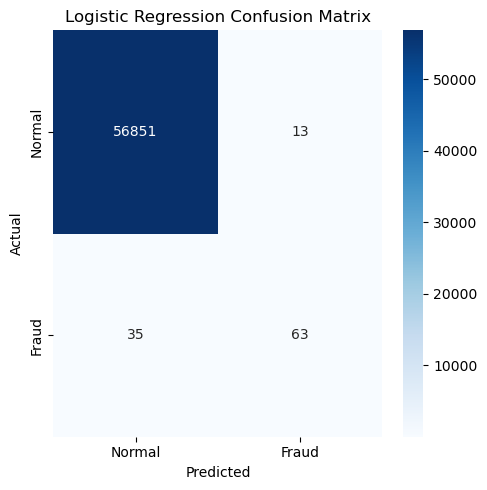

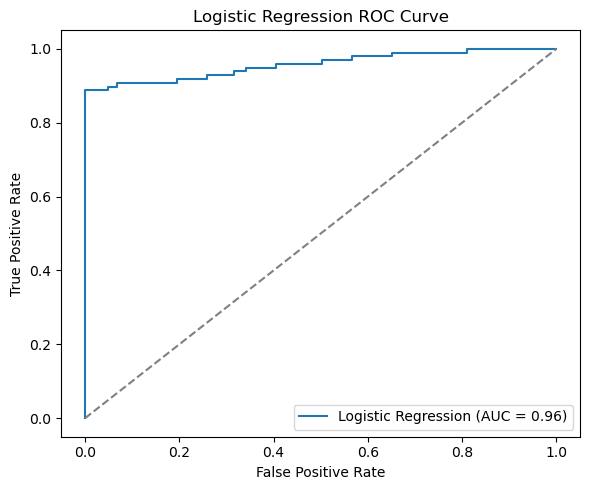

In [49]:
 evaluate_model("Logistic Regression", LogisticRegression(), X_train, X_test, y_train, y_test)



Decision Tree Performansı:
Accuracy: 0.9991397773954567
Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56864
           1       0.75      0.74      0.75        98

    accuracy                           1.00     56962
   macro avg       0.88      0.87      0.87     56962
weighted avg       1.00      1.00      1.00     56962



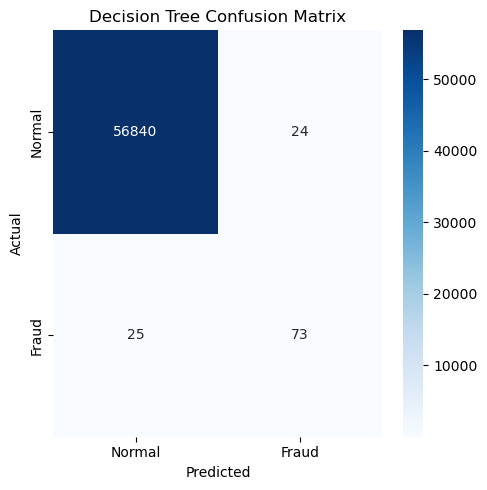

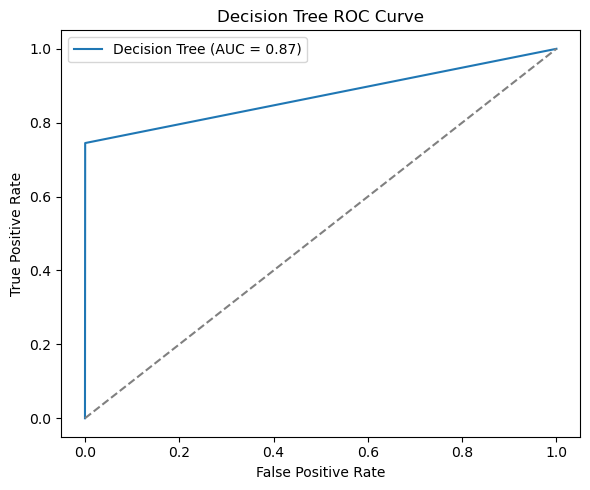

In [50]:
 evaluate_model("Decision Tree", DecisionTreeClassifier(random_state=42), X_train, X_test, y_train, y_test)



Random Forest Performansı:
Accuracy: 0.9995962220427653
Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56864
           1       0.94      0.82      0.87        98

    accuracy                           1.00     56962
   macro avg       0.97      0.91      0.94     56962
weighted avg       1.00      1.00      1.00     56962



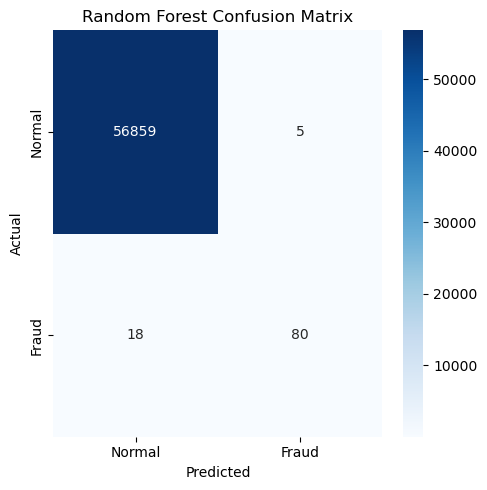

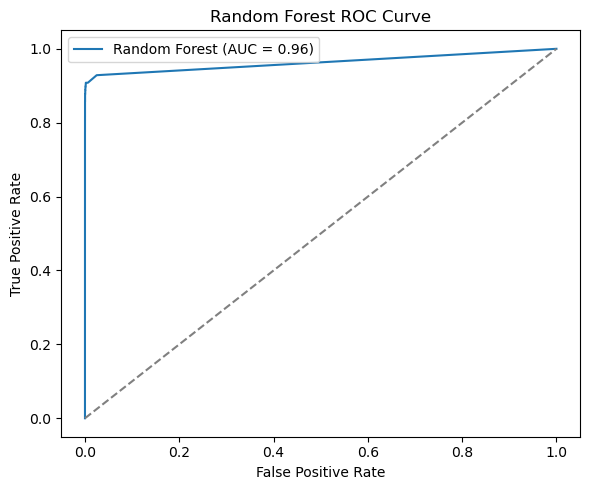

In [51]:
 evaluate_model( "Random Forest", RandomForestClassifier(n_estimators=100, random_state=42), X_train, X_test, y_train, y_test)


c:\Users\uzsez\.conda\envs\fraud\Lib\site-packages\xgboost\core.py:158: UserWarning: [21:41:49] WARNING: C:\b\abs_90_bwj_86a\croot\xgboost-split_1724073762025\work\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)



XGBoost Performansı:
Accuracy: 0.9995435553526912
Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56864
           1       0.92      0.81      0.86        98

    accuracy                           1.00     56962
   macro avg       0.96      0.90      0.93     56962
weighted avg       1.00      1.00      1.00     56962



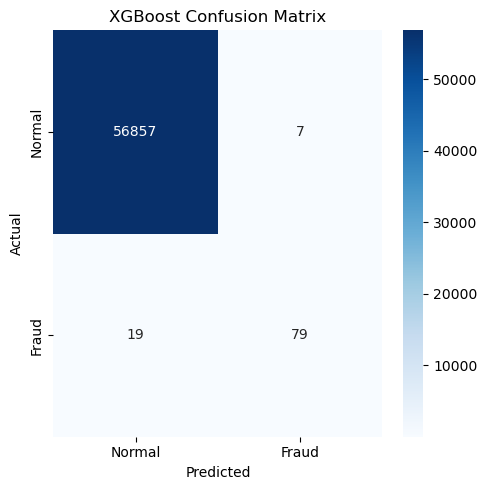

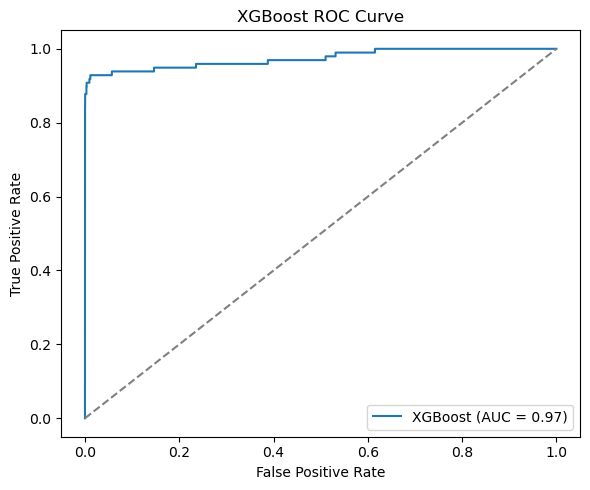

In [52]:
 evaluate_model("XGBoost", XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42), X_train, X_test, y_train, y_test)



Neural Network Performansı:
Accuracy: 0.9995435553526912
Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56864
           1       0.92      0.81      0.86        98

    accuracy                           1.00     56962
   macro avg       0.96      0.90      0.93     56962
weighted avg       1.00      1.00      1.00     56962



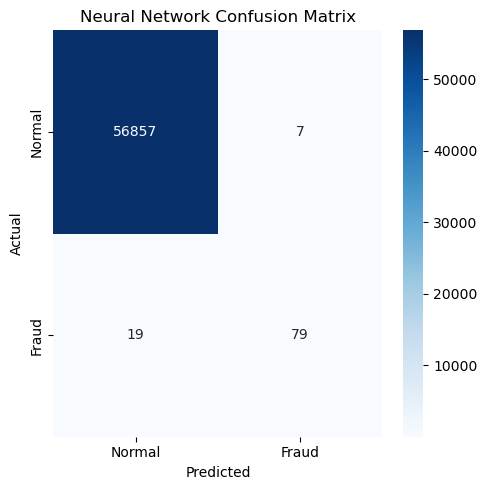

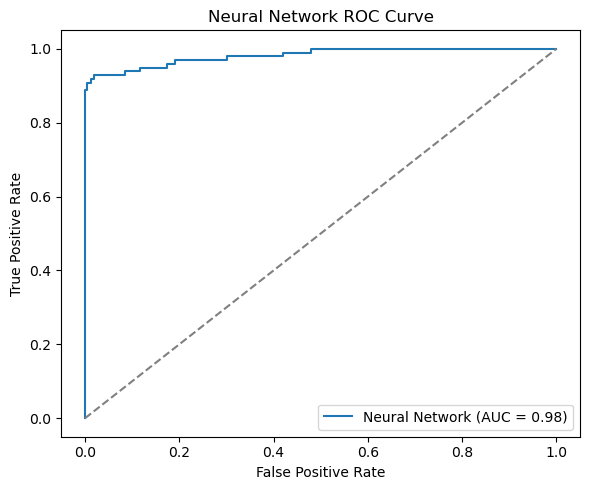

In [53]:
 evaluate_model("Neural Network", MLPClassifier(max_iter=300, random_state=42), X_train, X_test, y_train, y_test)


[LightGBM] [Info] Number of positive: 394, number of negative: 227451
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.024214 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 7650
[LightGBM] [Info] Number of data points in the train set: 227845, number of used features: 30
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.001729 -> initscore=-6.358339
[LightGBM] [Info] Start training from score -6.358339

LightGBM Performansı:
Accuracy: 0.9958919981742214
Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56864
           1       0.21      0.51      0.30        98

    accuracy                           1.00     56962
   macro avg       0.61      0.75      0.65     56962
weighted avg       1.00      1.00      1.00     56962



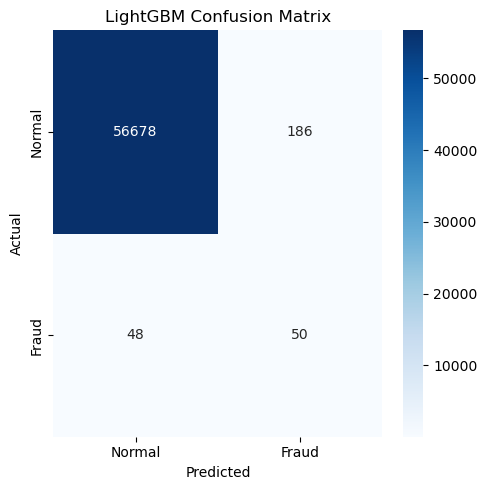

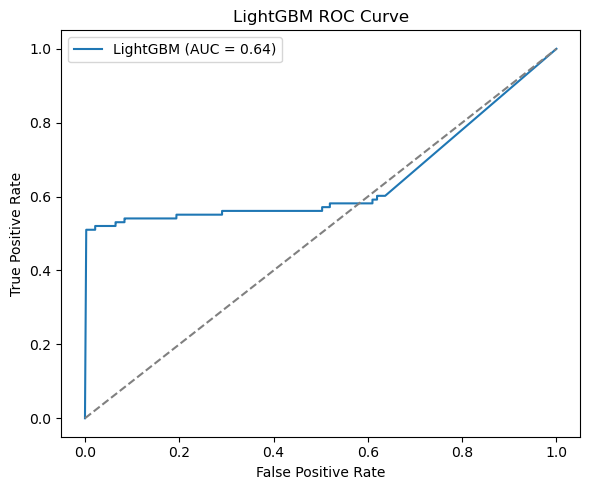

In [54]:
 evaluate_model("LightGBM", LGBMClassifier(random_state=42), X_train, X_test, y_train, y_test)



K-Nearest Neighbors Performansı:
Accuracy: 0.9995435553526912
Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56864
           1       0.92      0.81      0.86        98

    accuracy                           1.00     56962
   macro avg       0.96      0.90      0.93     56962
weighted avg       1.00      1.00      1.00     56962



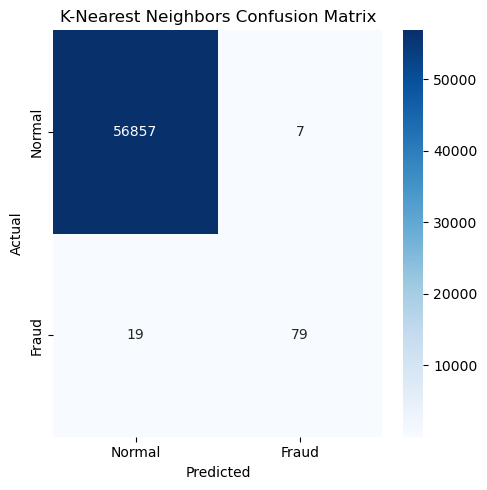

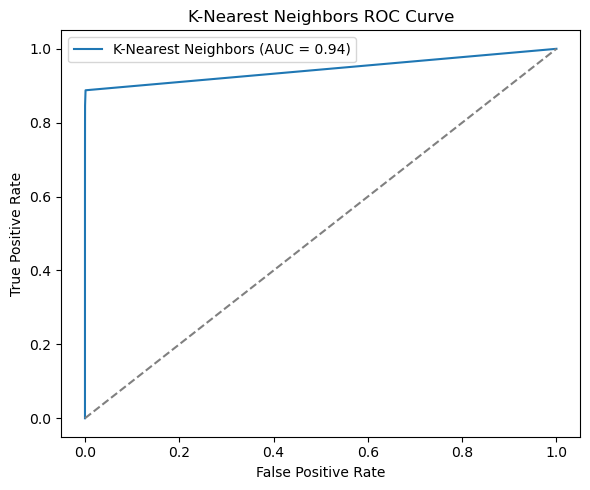

In [55]:
 evaluate_model("K-Nearest Neighbors", KNeighborsClassifier(), X_train, X_test, y_train, y_test)



Support Vector Machine Performansı:
Accuracy: 0.999403110845827
Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56864
           1       0.94      0.69      0.80        98

    accuracy                           1.00     56962
   macro avg       0.97      0.85      0.90     56962
weighted avg       1.00      1.00      1.00     56962



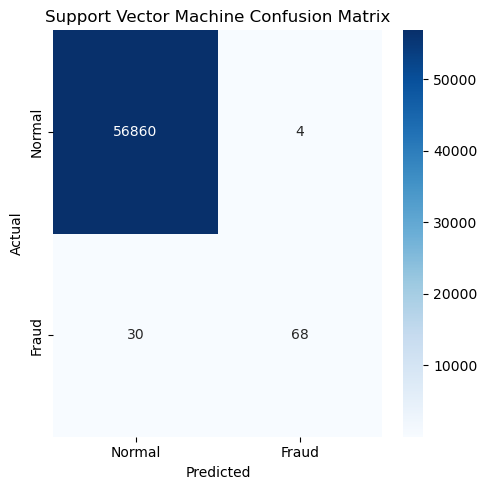

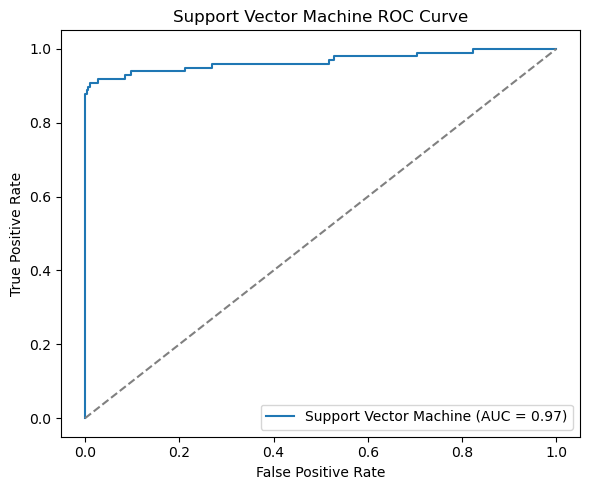

In [56]:
 evaluate_model("Support Vector Machine", SVC(probability=True, random_state=42), X_train, X_test, y_train, y_test)



Naive Bayes Performansı:
Accuracy: 0.9764053228468101
Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.98      0.99     56864
           1       0.06      0.85      0.11        98

    accuracy                           0.98     56962
   macro avg       0.53      0.91      0.55     56962
weighted avg       1.00      0.98      0.99     56962



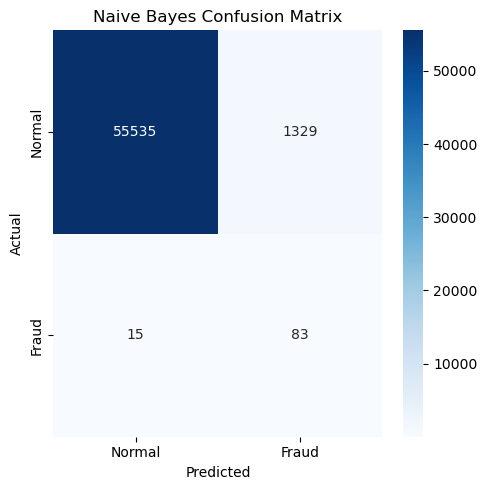

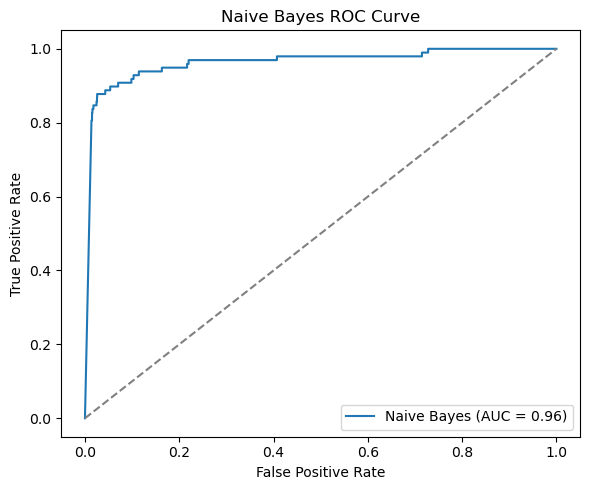

In [57]:
 evaluate_model("Naive Bayes", GaussianNB(), X_train, X_test, y_train, y_test)



Ridge Classifier Performansı:
Accuracy: 0.9988413328183702
Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56864
           1       0.78      0.46      0.58        98

    accuracy                           1.00     56962
   macro avg       0.89      0.73      0.79     56962
weighted avg       1.00      1.00      1.00     56962



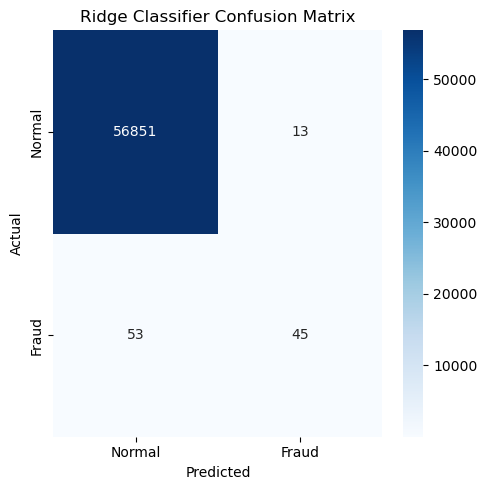

In [58]:
 evaluate_model("Ridge Classifier", RidgeClassifier(), X_train, X_test, y_train, y_test)
